In [6]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import string
string.punctuation 
print (string.punctuation) 
stop_words = stopwords.words('english')
# -*- coding: utf-8 -*-
punctuation = [ c for c in string.punctuation ] + [u'\u201c',u'\u201d',u'\u2018',u'\u2019']
import matplotlib.pyplot as plt
import re

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ewanevans/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!ls

10k_unfiltered.csv
20k_2008.csv
2k_general.csv
5k_2008.csv
Ewan_first_twitter_top2vec.ipynb
Ewan_optimise_top2vec_20K.ipynb
Ewan_top2vec_test.ipynb
Jenna_2k_tweets.ipynb
training.1600000.processed.noemoticon.csv


In [3]:
data = pd.read_csv('20k_2008.csv')

In [4]:
data_df = data.copy()

In [5]:
data_df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count
0,0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0
1,1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0
2,2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0
3,3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0
4,4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0


In [7]:
def remove_punc(text):
    txt=text
    for punc in punctuation:
        txt = txt.replace(punc, " ")
    txt = txt.lower()
    return txt 

def remove_URL_and_HTML(row):
    row = re.sub(r'https.*$', "", row)
    return row

def remove_stopwords(row):
    row = word_tokenize(row)
    return ' '.join(w for w in row if not w in stop_words)

def preprocessing(col):
    col = col.astype(str)
    punctuation_list = col.apply(remove_punc)
    URL = punctuation_list.apply(remove_URL_and_HTML)
    word_tokens = URL.apply(remove_stopwords)                                           
    return word_tokens

In [8]:
data_df['preprocessed'] = preprocessing(data_df["Text"])

In [9]:
data_df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,preprocessed
0,0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0,rwanda policy impact migrants uk borders inspe...
1,1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0,asylum seeker claims uk hotel stay worse prison
2,2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0,half 130 asylum seekers facing first deportati...
3,3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0,rwanda plan working 80 migrants land dover tod...
4,4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0,anger hundreds refugee children ukraine left s...


In [11]:
data_df["Tweet Id"].nunique()

17153

In [12]:
data_df_no_duplicates = data_df.drop_duplicates(subset='Tweet Id', keep="first")

In [13]:
data_df_no_duplicates["Tweet Id"].nunique()

17153

In [14]:
data_df_no_duplicates = data_df.drop_duplicates(subset='preprocessed', keep="first")

In [15]:
data_df_no_duplicates["preprocessed"].nunique()

13181

In [16]:
from top2vec import Top2Vec

In [17]:
list_tweets = [i for i in data_df_no_duplicates['preprocessed']]

In [18]:
len(list_tweets)

13181

In [19]:
tweet_lengths = [len(i.split(" ")) for i in list_tweets]

In [20]:
tweet_lengths[0]

12

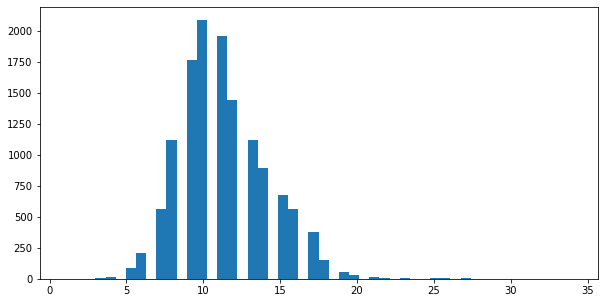

In [21]:
plt.figure(figsize=(10,5))
plt.hist(tweet_lengths, bins=50);

In [22]:
model_1 = Top2Vec(list_tweets, workers=-2, speed='fast-learn', min_count=130)

2022-06-09 10:05:03,793 - top2vec - INFO - Pre-processing documents for training
2022-06-09 10:05:04,275 - top2vec - INFO - Creating joint document/word embedding
2022-06-09 10:05:04,622 - top2vec - INFO - Creating lower dimension embedding of documents
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2022-06-09 10:05:23,991 - top2vec - INFO - Finding dense areas of documents
2022-06-09 10:05:24,732 - top2vec - INFO - Finding topics


In [23]:
model_1.get_num_topics()

3

In [25]:
model_1.topic_words[0]

array(['crisis', 'killed', 'russia', 'borders', 'back', 'policy', 'years',
       'germany', 'bit', 'man', 'get', 'crossing', 'asylum', 'old',
       'brussels', 'four', 'attacks', 'stop', 'face', 'warns', 'one',
       'trying', 'help', 'illegal', 'british', 'new', 'plans', 'home',
       'fears', 'migrants', 'three', 'five', 'woman', 'chaos', 'sex',
       'revealed', 'war', 'german', 'says', 'ukraine', 'first', 'jailed',
       'us', 'refugee', 'france', 'boat', 'labour', 'foreigners',
       'border', 'uk'], dtype='<U11')

In [26]:
model_1.topic_words[1]

array(['cross', 'seekers', 'family', 'exclusive', 'italy', 'turkey',
       'british', 'set', 'raped', 'desperate', 'boat', 'number', 'centre',
       'take', 'warns', 'borders', 'ly', 'government', 'open', 'hundreds',
       'police', 'border', 'trying', 'forced', 'chaos', 'brexit',
       'cameron', 'german', 'eu', 'amid', 'camp', 'million', 'patel',
       'year', 'merkel', 'country', 'live', 'deport', 'near', 'illegal',
       'bit', 'row', 'theresa', 'terror', 'channel', 'go', 'force',
       'back', 'english', 'new'], dtype='<U11')

In [27]:
model_1.topic_words[2]

array(['could', 'illegal', 'amid', 'trump', 'foreign', 'death', 'first',
       'anti', 'deal', 'open', 'go', 'crisis', 'year', 'forced', 'trying',
       'five', 'policy', 'raped', 'seeker', 'fears', 'chaos', 'face',
       'revealed', 'italy', 'centre', 'arrested', 'one', 'english',
       'turkey', 'near', 'camp', 'france', 'help', 'two', 'benefits',
       'russian', 'immigration', 'row', 'free', 'immigrant', 'priti',
       'migrant', 'man', 'merkel', 'people', 'children', 'brexit', 'stop',
       'labour', 'migration'], dtype='<U11')

In [76]:
list_of_xtra_stop_words = ['Djokovic', 'http', 'migrant', 'migration', 'migrants', 'migrates', 'foreign', 'foreigner', 'foreigners', 'immigration', 'immigrant', 'asylum', 'refugee', 'refugees', 'visa', 'visas', 'borders', 'border', 'deport', 'deportation', 'deports', 'uk', 'co', 'must', 'set', 'bit', 'one', 'says', 'to','ly', 'get' ]
len(list_of_xtra_stop_words)

31

In [77]:
stop_words.extend(list_of_xtra_stop_words)

In [78]:
data_df_no_stopwords = data.copy()

In [79]:
data_df_no_stopwords['preprocessed'] = preprocessing(data_df_1['Text'])

In [80]:
data_df_no_stopwords.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,preprocessed
0,0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2.0,rwanda policy impact inspector numbers crossin...
1,1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8.0,seeker claims hotel stay worse prison
2,2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8.0,half 130 seekers facing first flights rwanda n...
3,3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5.0,rwanda plan working 80 land dover today despit...
4,4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16.0,anger hundreds children ukraine left stranded ...


In [81]:
data_df_no_stopwords = data_df_no_stopwords.drop_duplicates(subset='preprocessed', keep="first")

In [82]:
data_df_no_stopwords.shape

(13173, 7)

In [83]:
list_tweets_2 = [i for i in data_df_no_stopwords['preprocessed']]

In [38]:
model_2 = Top2Vec(list_tweets_2, workers=-2, speed='fast-learn', min_count=130)

2022-06-09 10:16:42,049 - top2vec - INFO - Pre-processing documents for training
2022-06-09 10:16:42,536 - top2vec - INFO - Creating joint document/word embedding
2022-06-09 10:16:42,900 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-09 10:16:53,753 - top2vec - INFO - Finding dense areas of documents
2022-06-09 10:16:54,466 - top2vec - INFO - Finding topics


In [39]:
model_2.get_num_topics()

37

In [44]:
model_2.topic_words[32]

array(['free', 'france', 'lorry', 'back', 'control', 'attacks', 'russian',
       'raped', 'government', 'britain', 'country', 'north', 'exclusive',
       'says', 'priti', 'year', 'live', 'trump', 'german', 'boat',
       'million', 'breaking', 'revealed', 'merkel', 'camp', 'death',
       'labour', 'years', 'eu', 'five', 'hundreds', 'man', 'rules',
       'force', 'fears', 'germany', 'afghan', 'stop', 'must', 'arrested',
       'ly', 'policy', 'face', 'could', 'child', 'channel', 'may', 'dead',
       'police', 'patel'], dtype='<U10')

In [45]:
model_2.topic_words[11]

array(['help', 'set', 'calls', 'family', 'may', 'child', 'force',
       'minister', 'plan', 'lorry', 'ukrainian', 'russian', 'boat',
       'trying', 'live', 'french', 'claims', 'death', 'people', 'old',
       'girl', 'channel', 'say', 'seeker', 'police', 'ukraine', 'open',
       'stop', 'troops', 'says', 'raped', 'attack', 'cameron', 'near',
       'britain', 'immigrants', 'pm', 'arrested', 'office', 'free',
       'north', 'year', 'million', 'government', 'greece', 'labour',
       'get', 'day', 'policy', 'row'], dtype='<U10')

In [46]:
model_2.topic_words[2]

array(['fears', 'found', 'set', 'pm', 'child', 'putin', 'bid', 'row',
       'rules', 'girl', 'dead', 'isis', 'north', 'open', 'english',
       'first', 'five', 'killed', 'illegal', 'attack', 'channel', 'woman',
       'syrian', 'lorry', 'years', 'bit', 'patel', 'seekers', 'help',
       'may', 'france', 'raped', 'says', 'cameron', 'afghan', 'sex',
       'german', 'police', 'calls', 'turkey', 'thousands', 'man',
       'germany', 'ukrainian', 'jailed', 'policy', 'plan', 'boris',
       'labour', 'year'], dtype='<U10')

In [42]:
topic_mapping = model_2.hierarchical_topic_reduction(num_topics=10)

In [43]:
topic_mapping[1]

[32, 11, 2]

In [53]:
model_3 = Top2Vec(list_tweets_2, workers=-2, speed='deep-learn', min_count=130)

2022-06-09 10:26:03,823 - top2vec - INFO - Pre-processing documents for training
2022-06-09 10:26:04,170 - top2vec - INFO - Creating joint document/word embedding
2022-06-09 10:26:07,126 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-09 10:26:18,448 - top2vec - INFO - Finding dense areas of documents
2022-06-09 10:26:19,209 - top2vec - INFO - Finding topics


In [49]:
!pip install tensorflow tensorflow_hub tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.5/228.5 MB 3.7 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 5.3 MB/s eta 0:00:0000:0100:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py) ... done
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.7/961.7 kB 4.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 4.2 MB/s eta 0:00:0000:0100:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 5.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  Running setup.py install for termcolor ... done


In [51]:
!pip install top2vec[sentence_encoders]

zsh:1: no matches found: top2vec[sentence_encoders]


In [54]:
model_3.get_num_topics()

43

In [55]:
model_3.topic_words[0]

array(['years', 'children', 'pm', 'isis', 'calais', 'help', 'country',
       'policy', 'sex', 'open', 'year', 'france', 'row', 'number', 'day',
       'says', 'italy', 'jailed', 'syrian', 'europe', 'say', 'britain',
       'live', 'patel', 'terror', 'killed', 'irish', 'germany', 'seekers',
       'greece', 'channel', 'deal', 'people', 'brexit', 'force', 'north',
       'breaking', 'government', 'death', 'found', 'cameron', 'bit',
       'fears', 'arrested', 'may', 'forced', 'putin', 'office',
       'minister', 'two'], dtype='<U10')

In [56]:
topic_mapping = model_3.hierarchical_topic_reduction(num_topics=5)

In [59]:
len(topic_mapping)

5

In [57]:
topic_mapping[1]

[12, 6, 41, 1, 29, 5]

In [60]:
model_3.get_topic_hierarchy()

[[24, 28, 33, 26, 30, 14, 42, 21, 20],
 [12, 6, 41, 1, 29, 5],
 [31, 32, 9, 39, 16, 13, 25, 2],
 [0, 8, 23, 10, 34, 40, 37, 27, 35, 7, 36, 4, 38, 3],
 [11, 22, 19, 17, 15, 18]]

In [61]:
model_3.get_topics(reduced=True)

(array([['ukraine', 'one', 'europe', 'german', 'war', 'french', 'four',
         'chaos', 'year', 'old', 'british', 'woman', 'attacks', 'policy',
         'found', 'isis', 'revealed', 'centre', 'illegal', 'greece',
         'police', 'must', 'man', 'merkel', 'home', 'english', 'country',
         'calls', 'cross', 'crossing', 'child', 'may', 'face', 'seekers',
         'turkey', 'brussels', 'force', 'david', 'stop', 'syrian',
         'control', 'breaking', 'crisis', 'plan', 'set', 'deal', 'back',
         'britain', 'ukrainian', 'migration'],
        ['across', 'says', 'family', 'force', 'troops', 'bit', 'go',
         'new', 'david', 'attacks', 'trying', 'day', 'patel', 'priti',
         'lorry', 'free', 'two', 'could', 'take', 'police', 'control',
         'boris', 'raped', 'woman', 'revealed', 'centre', 'chaos',
         'hundreds', 'trump', 'five', 'benefits', 'row', 'face',
         'germany', 'million', 'anti', 'boats', 'theresa', 'russia',
         'calls', 'get', 'brexit', 'pl

In [64]:
model_3.query_documents("compassion", num_docs=10)

(array(['number u muslims double 6 2m 20 years high birth… goo gl fb 6ltzm',
        'revealed hit germany faces massive benefit bill claims double',
        'nigerian lover proposed 6 months said wed qamwdteynz sih6rflwqp',
        'french police stand watch launch dinghies channel',
        'ukraine passport website crashes eu votes free travel',
        'traffic brought standstill port dover anti protesters chanting english streets march crossings',
        'iraqi 46 banned roads trying cheat driving theory test smuggling bluetooth earpiece',
        'nigerian lover proposed 6 months said wed johcntguyo tmw1hj65hh',
        'hope get raped far right activist outburst channel 4 challenging woman adopt',
        'un bureaucrat accuses britain xenophobic calais crisis w8ys8qz5se m6ew0yytca'],
       dtype=object),
 array([0.23219578, 0.22551046, 0.20798838, 0.1994774 , 0.19581339,
        0.19274381, 0.19144526, 0.19128537, 0.19083524, 0.19077599],
       dtype=float32),
 array([12899,

In [65]:
model_4 = Top2Vec(list_tweets_2, workers=-2, speed='deep-learn', min_count=100, ngram_vocab=True)

2022-06-09 10:49:44,255 - top2vec - INFO - Pre-processing documents for training
2022-06-09 10:49:44,584 - top2vec - INFO - Creating joint document/word embedding
2022-06-09 10:49:48,657 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-09 10:49:59,492 - top2vec - INFO - Finding dense areas of documents
2022-06-09 10:50:00,240 - top2vec - INFO - Finding topics


In [66]:
model_4.get_num_topics()

40

In [67]:
topic_mapping = model_4.hierarchical_topic_reduction(num_topics=5)

In [68]:
model_4.get_topic_hierarchy()

[[22, 3, 16, 23, 7],
 [19, 34, 33, 14, 25, 11, 5, 17, 6, 9, 15],
 [31, 27, 39, 18, 35, 32, 10, 13, 12],
 [29, 21, 36, 4, 2, 0, 8, 24, 38, 26],
 [37, 20, 28, 30, 1]]

In [69]:
model_4.get_topics(reduced=True)

(array([['life jackets', 'great wall', 'claim', 'feared drowned', 'found',
         'mps warn', 'one', 'six months', 'daily express', 'ukip mep',
         'two', 'dramatic moment', 'magnitude earthquake', 'gang raped',
         'iain duncan', 'knife wielding', 'special forces',
         'train station', 'hate preacher', 'yvette cooper', 'use tear',
         'neo nazis', 'eastern european', 'hungary pm', 'could',
         'claim benefits', 'open doors', 'european commission',
         'make easier', 'record numbers', 'turn away', 'desperate',
         'rescue ship', 'fast track', 'four years', 'greek island',
         'fears', 'north korea', 'merkel open', 'hits back', 'trump',
         'ship carrying', 'ten year', 'eight years', 'boats sink',
         'gb news', 'prince harry', 'dead', 'court hears',
         'tensions rise'],
        ['mediterranean', 'crisis spirals', 'take', 'mass migration',
         'figures reveal', 'human rights', 'illegal immigrants', 'attack',
         'per ce

In [74]:
model_4.query_documents("compassion", num_docs=10)

(array(['number u muslims double 6 2m 20 years high birth… goo gl fb 6ltzm',
        'revealed hit germany faces massive benefit bill claims double',
        'nigerian lover proposed 6 months said wed qamwdteynz sih6rflwqp',
        'french police stand watch launch dinghies channel',
        'ukraine passport website crashes eu votes free travel',
        'traffic brought standstill port dover anti protesters chanting english streets march crossings',
        'iraqi 46 banned roads trying cheat driving theory test smuggling bluetooth earpiece',
        'nigerian lover proposed 6 months said wed johcntguyo tmw1hj65hh',
        'hope get raped far right activist outburst channel 4 challenging woman adopt',
        'un bureaucrat accuses britain xenophobic calais crisis w8ys8qz5se m6ew0yytca'],
       dtype=object),
 array([0.23219578, 0.22551046, 0.20798838, 0.1994774 , 0.19581339,
        0.19274381, 0.19144526, 0.19128537, 0.19083524, 0.19077599],
       dtype=float32),
 array([12899,

In [84]:
model_5 = Top2Vec(list_tweets_2, workers=-2, speed='deep-learn', min_count=100, ngram_vocab=True)

2022-06-09 11:01:26,869 - top2vec - INFO - Pre-processing documents for training
2022-06-09 11:01:27,349 - top2vec - INFO - Creating joint document/word embedding
2022-06-09 11:01:31,471 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-09 11:01:42,942 - top2vec - INFO - Finding dense areas of documents
2022-06-09 11:01:43,709 - top2vec - INFO - Finding topics


In [87]:
topic_mapping = model_5.hierarchical_topic_reduction(num_topics=5)

In [88]:
model_5.get_topic_hierarchy()

[[11, 26, 34, 2, 6, 21, 36, 20, 40, 27, 12, 15],
 [25, 18, 38, 13, 33, 5],
 [37, 24, 22, 7, 19, 32, 41, 16, 39, 42, 30, 9, 14],
 [4, 35, 3, 29, 31, 28, 0],
 [8, 23, 17, 10, 1]]

In [89]:
model_5.get_topics(reduced=True)

(array([['world war', 'expats spain', 'christmas market', 'shanty town',
         'mediterranean', 'boris johnson', 'non eu', 'use tear',
         'coast libya', 'seekers', 'pepper spray', 'two thirds',
         'man arrested', 'car park', 'warns', 'storm fence',
         'biden administration', 'troops ukraine', 'greek island', 'eu',
         'build wall', 'low skilled', 'plans', 'take', 'child sex',
         'rio grande', 'lorry essex', 'two weeks', 'three years',
         'six years', 'walk free', 'send back', 'syria', 'three months',
         'suicide bomber', 'irish', 'back control', 'iraqi seeker',
         'trying cross', 'rescue boat', 'teenage girl',
         'cross mediterranean', 'trump wall', 'survival sex',
         'tommy robinson', 'north', 'emergency brake', 'libyan coast',
         'feared drowned', 'five'],
        ['small boat', 'cross', 'dead', 'heathrow airport', 'workers',
         'terror attack', 'julian assange', 'priti', 'join debate',
         'ed miliband', 

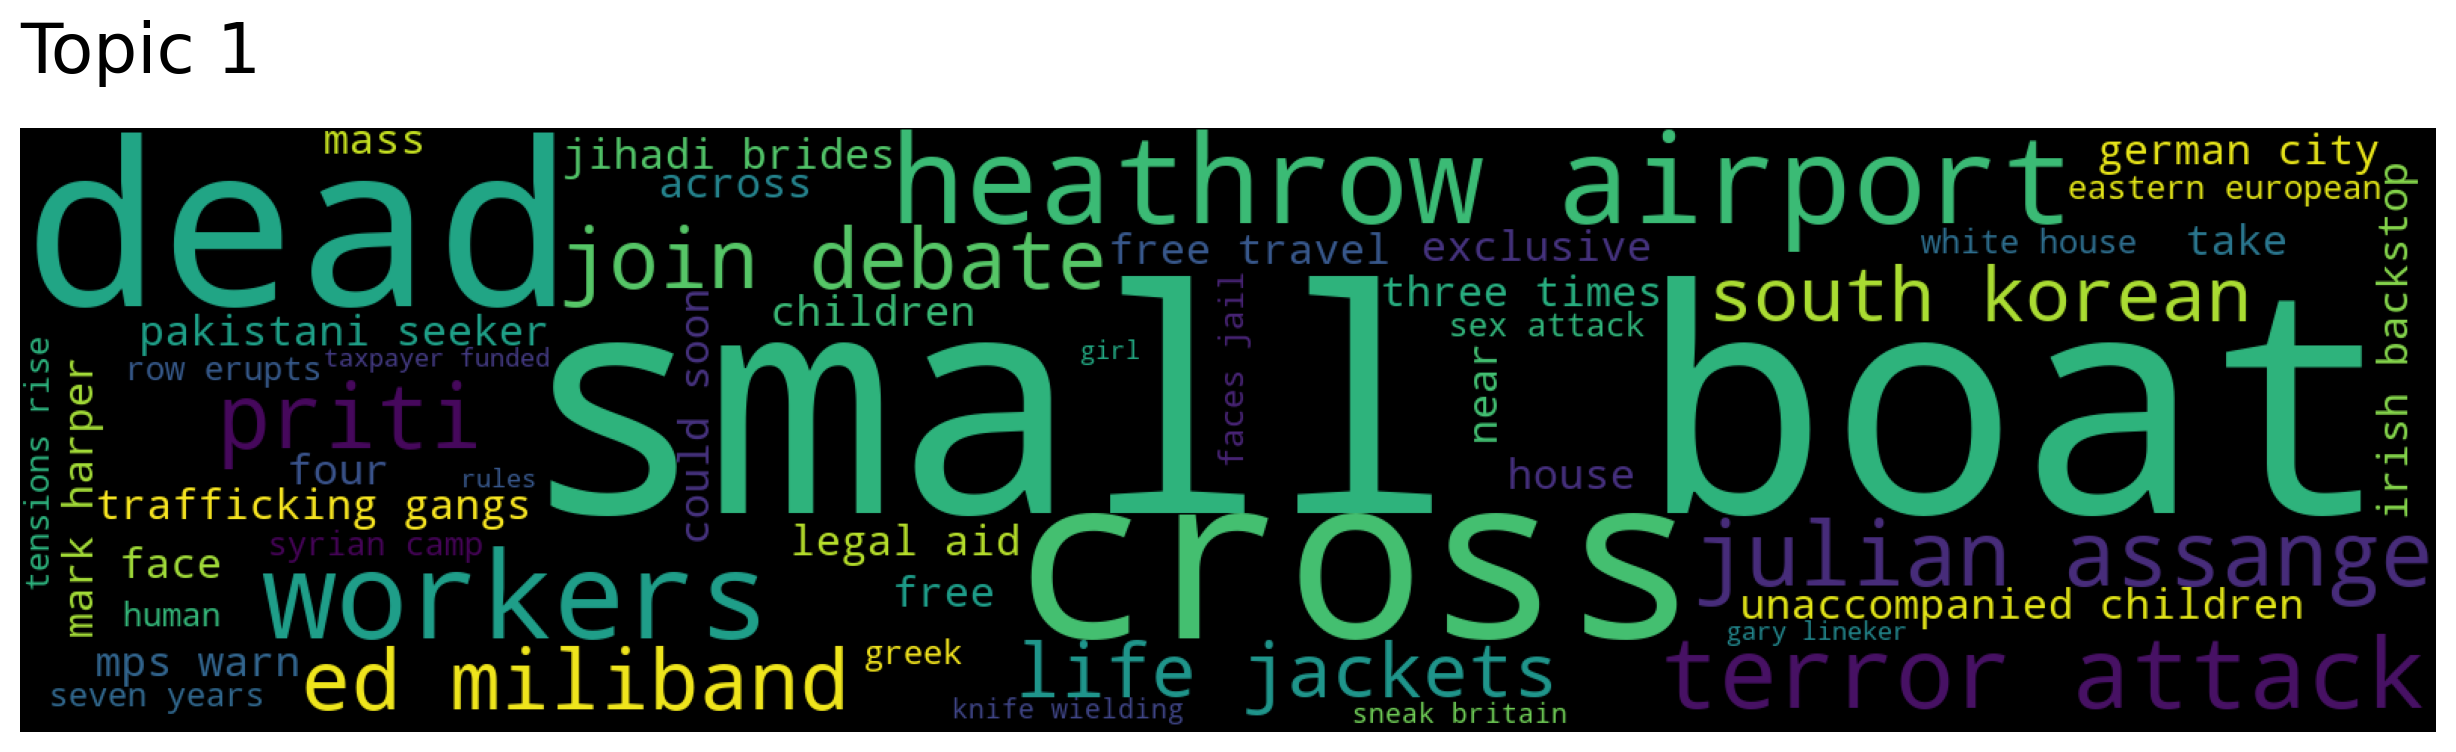

In [90]:
model_5.generate_topic_wordcloud(reduced=True, topic_num=1)

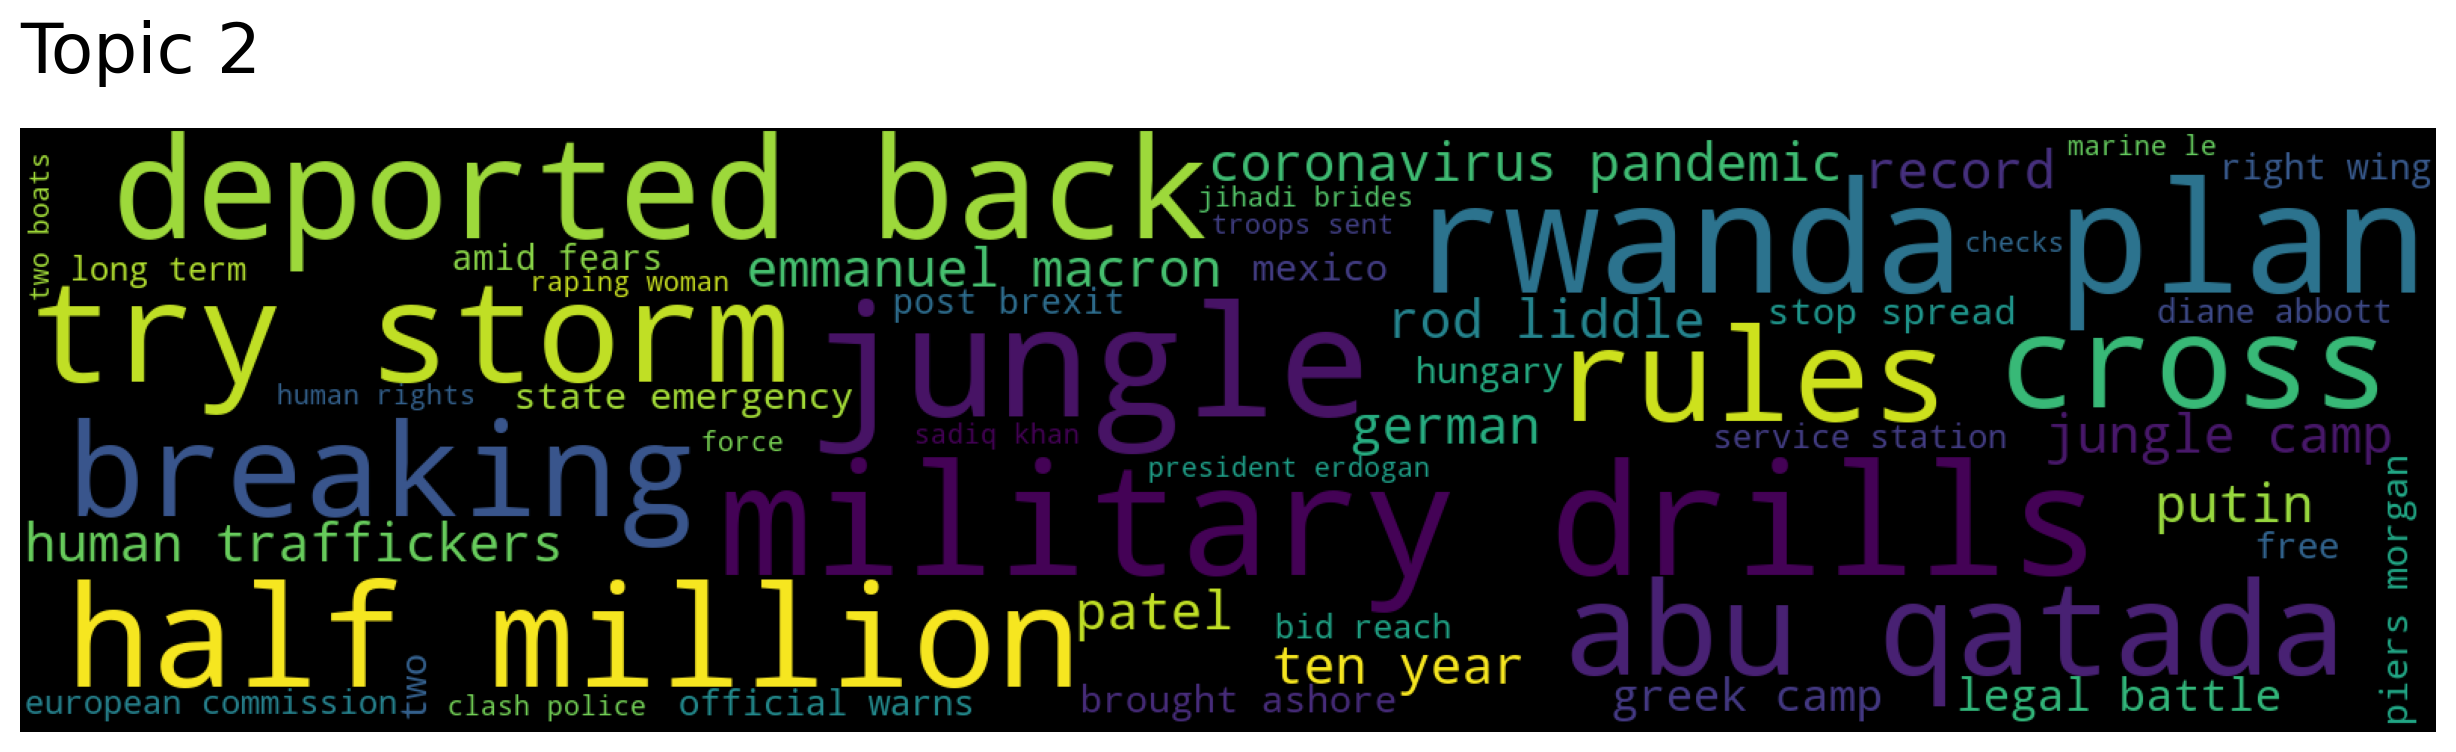

In [91]:
model_5.generate_topic_wordcloud(reduced=True, topic_num=2)

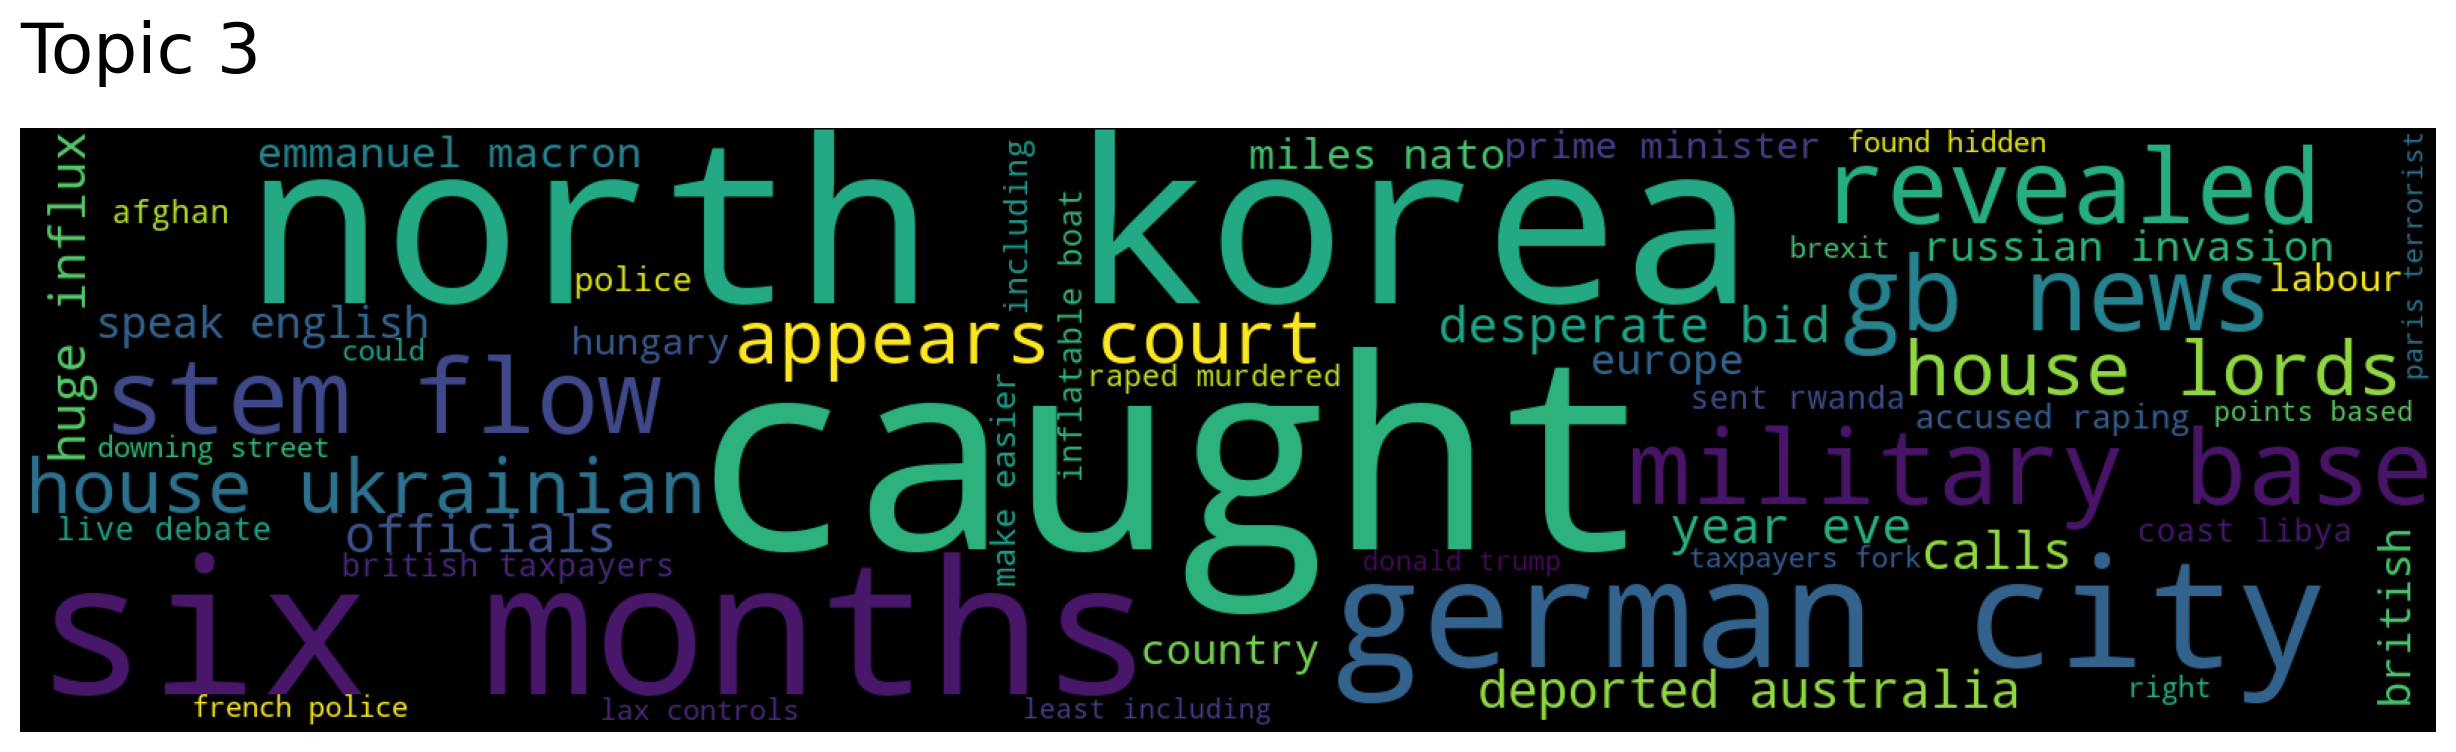

In [92]:
model_5.generate_topic_wordcloud(reduced=True, topic_num=3)

find number of documents associated with topics

In [94]:
!tensorflow_version 1.x

zsh:1: command not found: tensorflow_version


In [95]:
!pip install top2vec==1.0.16

  Attempting uninstall: top2vec
    Found existing installation: top2vec 1.0.27
    Uninstalling top2vec-1.0.27:
      Successfully uninstalled top2vec-1.0.27


In [96]:
!pip list | grep tensorflow

tensorflow                   2.9.1
tensorflow-estimator         2.9.0
tensorflow-hub               0.12.0
tensorflow-io-gcs-filesystem 0.26.0
tensorflow-text              2.9.0
